In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark1
from pytamp.action.place import PlaceAction
%matplotlib inline

In [2]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [3]:
def get_final_all_values(algo, budgets, n_seed, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark1_rearr_result/benchmark1_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj({obj_num})_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["c"] = c_list

    return result_all_values 

In [15]:
def plot_values(values, labels=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    if labels.size > 1:
        for value, label in zip(values, labels):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)  
    else:
        for label, value in enumerate(values):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)
    # plt.ylim([np.min(values),np.max(values)])

In [16]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    # mean_values = np.ma.masked_invalid(result_all_values[key_name]).mean(axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

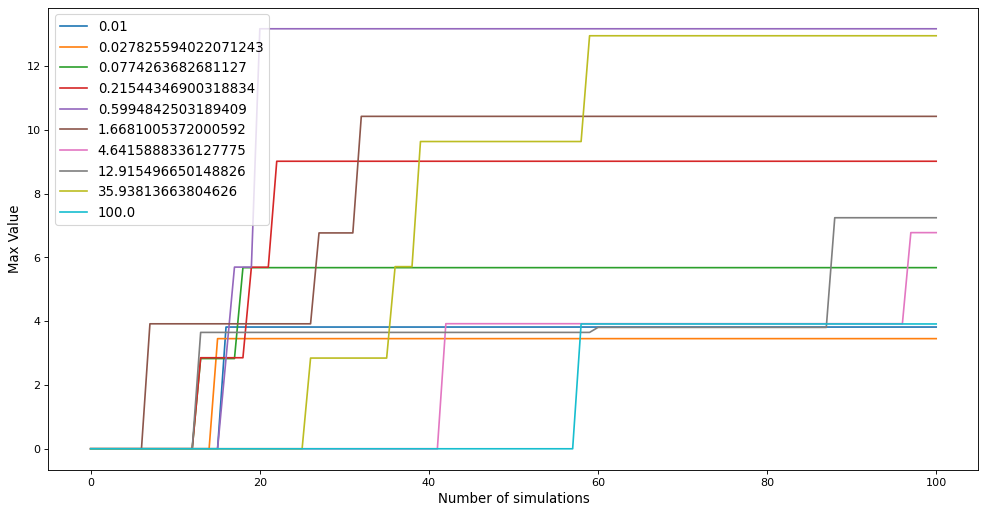

In [99]:
algo = "uct"
bai_perturb_result_all_values_flag_2 = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag=2,end_num =0)
perturb_mean_level_1_values_flag_2, perturb_std_level_1_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=1)
perturb_mean_level_2_values_flag_2, perturb_std_level_2_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_2['c'])
plot_values(perturb_mean_level_2_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

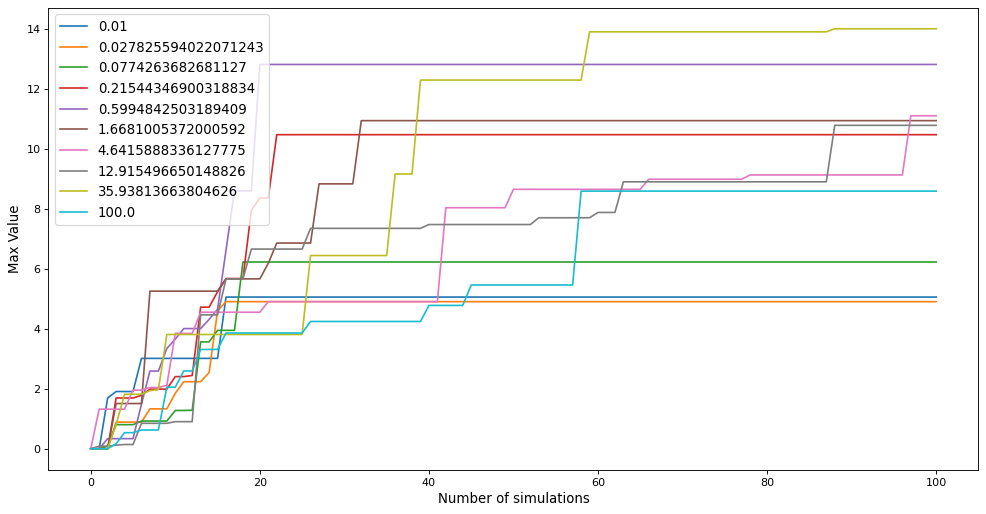

In [100]:
plot_values(perturb_mean_level_1_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

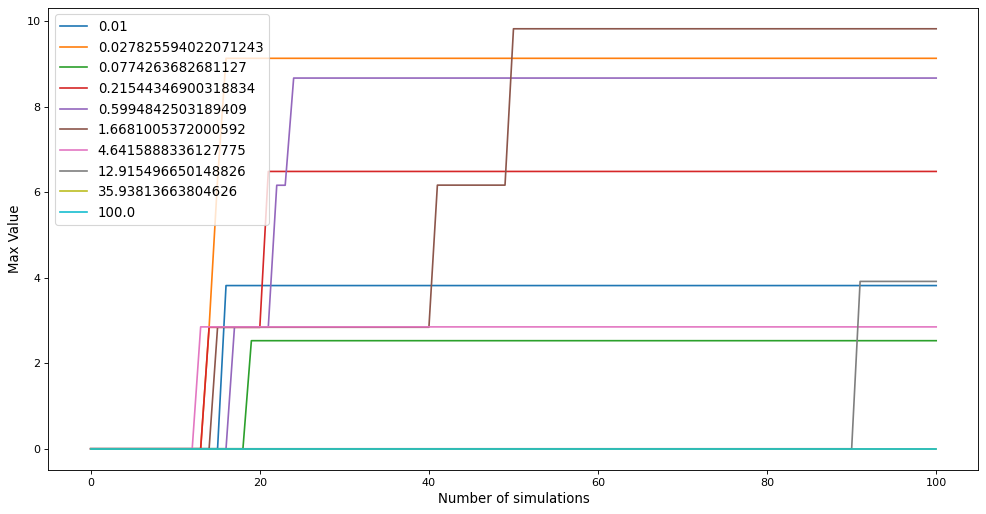

In [101]:
bai_perturb_result_all_values_flag_1 = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 1, end_num = 0)
perturb_mean_level_1_values_flag_1, perturb_std_level_1_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=1)
perturb_mean_level_2_values_flag_1, perturb_std_level_2_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_1['c'])
plot_values(perturb_mean_level_2_values_flag_1, labels=bai_perturb_result_all_values_flag_1['c'])

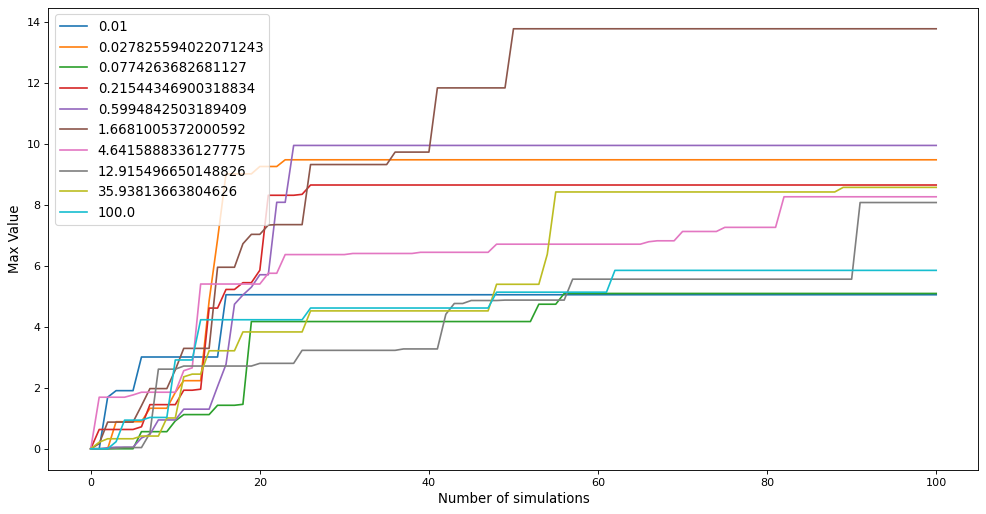

In [102]:
plot_values(perturb_mean_level_1_values_flag_1, labels=bai_perturb_result_all_values_flag_1['c'])

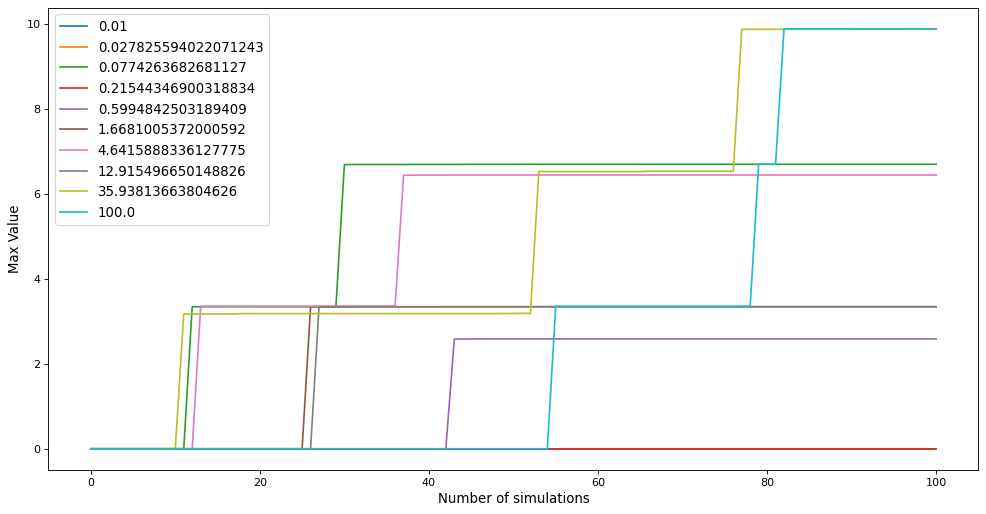

In [103]:
bai_perturb_result_all_values_flag_0 = get_final_all_values(algo, 100, n_seed = 5 ,obj_num = 6, flag = 0, end_num = 0)
perturb_mean_level_1_values_flag_0, perturb_std_level_1_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=1)
perturb_mean_level_2_values_flag_0, perturb_std_level_2_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_0['c'])
plot_values(perturb_mean_level_2_values_flag_0, labels=bai_perturb_result_all_values_flag_0['c'])

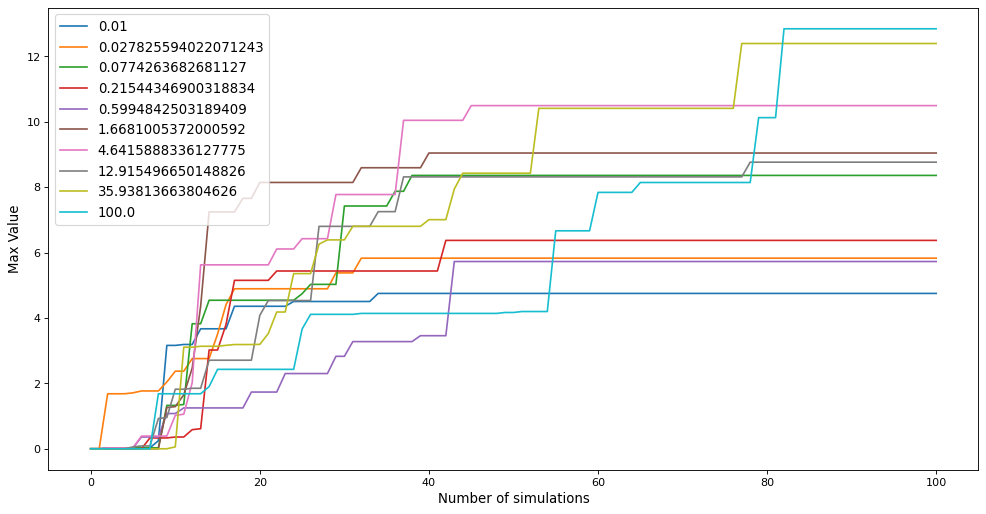

In [104]:
plot_values(perturb_mean_level_1_values_flag_0, labels=bai_perturb_result_all_values_flag_0['c'])

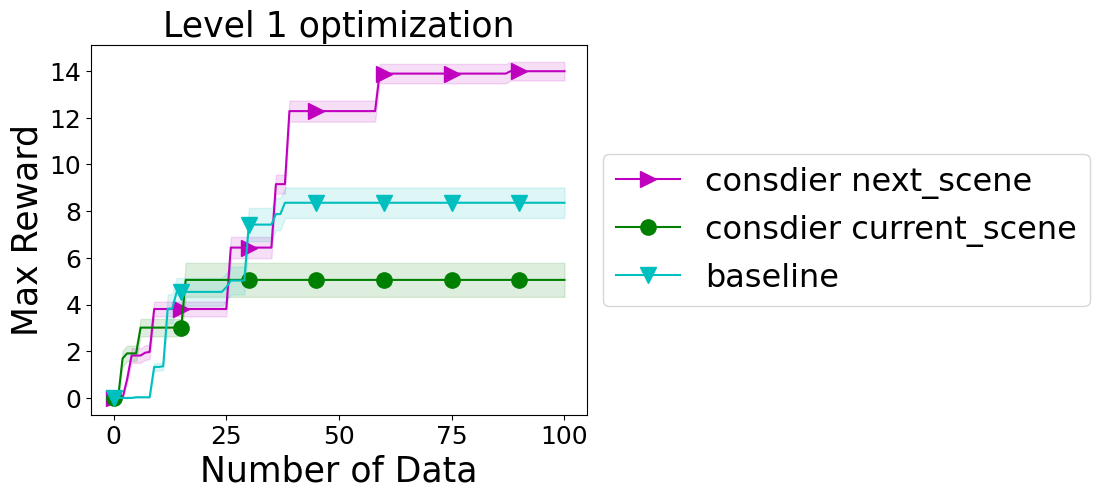

In [105]:
max_perturb_idx_flag_2 = np.argmax(perturb_mean_level_1_values_flag_2[:, -1])
perturb_level_1_flag_2_mean_list = perturb_mean_level_1_values_flag_2[max_perturb_idx_flag_2]
perturb_level_1_flag_2_std_list = perturb_std_level_1_values_flag_2[max_perturb_idx_flag_2]

max_perturb_idx_flag_1 = np.argmax(perturb_std_level_1_values_flag_1[:, -1])
perturb_level_1_flag_1_mean_list = perturb_mean_level_1_values_flag_1[max_perturb_idx_flag_1]
perturb_level_1_flag_1_std_list = perturb_std_level_1_values_flag_1[max_perturb_idx_flag_1]


max_perturb_idx_flag_0 = np.argmax(perturb_std_level_1_values_flag_0[:, -1])
perturb_level_1_flag_0_mean_list = perturb_mean_level_1_values_flag_0[max_perturb_idx_flag_0]
perturb_level_1_flag_0_std_list = perturb_std_level_1_values_flag_0[max_perturb_idx_flag_0]


x_list = np.arange(len(perturb_level_1_flag_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_1_flag_2_mean_list, perturb_level_1_flag_2_std_list, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, perturb_level_1_flag_1_mean_list, perturb_level_1_flag_1_std_list, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, perturb_level_1_flag_0_mean_list, perturb_level_1_flag_0_std_list, "baseline", "v", "c")

# print(perturb_mean_level_1_values_flag_2[max_perturb_idx_flag_2][-1])
# print(perturb_mean_level_1_values_flag_0[max_perturb_idx_flag_0][-1])
# print(bai_ucb_mean_level_1_values[max_bai_ucb_idx][-1])
# print(random_mean_level_1_values[max_random_idx][-1])

# print(np.argmax(perturb_level_1_flag_2_mean_list))
# print(np.argmax(bai_ucb_level_1_mean_list))

plt.title("Level 1 optimization", fontsize=25)
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

In [94]:
perturb_level_1_flag_1_mean_list

array([0.        , 0.08857143, 0.08857143, 0.10857143, 1.74857143,
       2.72380952, 2.72380952, 2.72380952, 2.72380952, 2.72380952,
       2.72380952, 2.72380952, 2.72380952, 2.72380952, 4.44380952,
       4.44380952, 4.44380952, 4.44380952, 4.44380952, 4.44380952,
       4.84190476, 4.84190476, 4.84190476, 6.86650794, 6.86650794,
       6.86650794, 6.86650794, 6.86650794, 6.86650794, 6.86650794,
       6.86650794, 6.86650794, 6.86650794, 6.86650794, 6.86650794,
       6.86650794, 6.86650794, 6.86650794, 6.86650794, 6.86650794,
       6.86650794, 6.86650794, 6.86650794, 6.86650794, 7.17222222,
       7.17222222, 7.17222222, 7.17222222, 7.17222222, 7.17222222,
       7.17222222, 7.17222222, 9.01269841, 9.01269841, 9.01269841,
       9.01269841, 9.01269841, 9.01269841, 9.01269841, 9.01269841,
       9.01269841, 9.01269841, 9.01269841, 9.01269841, 9.01269841,
       9.01269841, 9.01269841, 9.01269841, 9.01269841, 9.01269841,
       9.01269841, 9.01269841, 9.01269841, 9.01269841, 9.01269

In [95]:
max_perturb_idx_flag_2

6

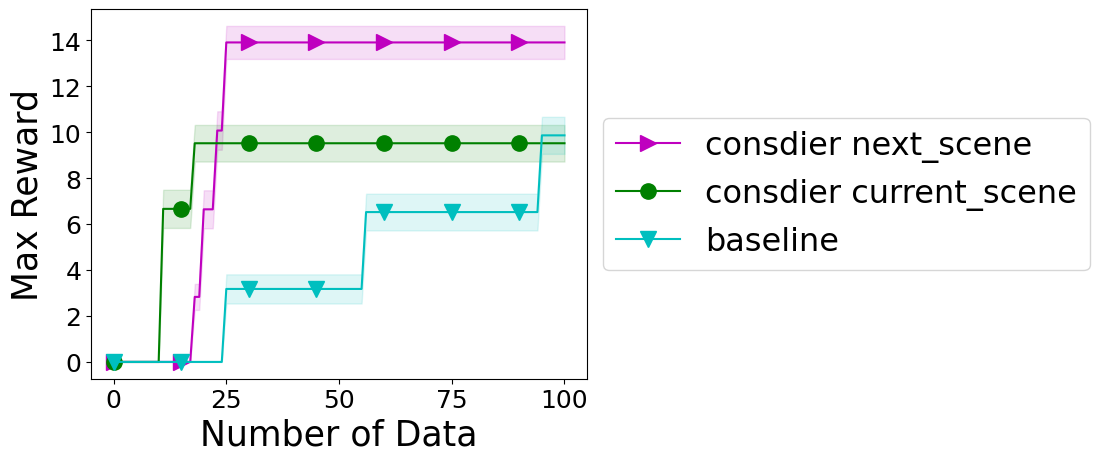

In [96]:
max_perturb_idx_flag_2 = np.argmax(perturb_mean_level_2_values_flag_2[:, -1])
perturb_level_2_flag_2_mean_list = perturb_mean_level_2_values_flag_2[max_perturb_idx_flag_2]
perturb_level_2_flag_2_std_list = perturb_std_level_2_values_flag_2[max_perturb_idx_flag_2]

max_perturb_idx_flag_1 = np.argmax(perturb_mean_level_2_values_flag_1[:, -1])
perturb_level_2_flag_1_mean_list = perturb_mean_level_2_values_flag_1[max_perturb_idx_flag_1]
perturb_level_2_flag_1_std_list = perturb_std_level_2_values_flag_1[max_perturb_idx_flag_1]

max_perturb_idx_flag_0 = np.argmax(perturb_mean_level_2_values_flag_0[:, -1])
perturb_level_2_flag_0_mean_list = perturb_mean_level_2_values_flag_0[max_perturb_idx_flag_0]
perturb_level_2_flag_0_std_list = perturb_std_level_2_values_flag_0[max_perturb_idx_flag_0]

# max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_2_values[:, -1])
# bai_ucb_level_2_mean_list = bai_ucb_mean_level_2_values[max_bai_ucb_idx]
# bai_ucb_level_2_std_list = bai_ucb_std_level_2_values[max_bai_ucb_idx]

# max_random_idx = np.argmax(random_mean_level_2_values[:, -1])
# random_level_2_mean_list = random_mean_level_2_values[max_random_idx]
# random_level_2_std_list = random_std_level_2_values[max_random_idx]

x_list = np.arange(len(perturb_level_2_flag_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_2_flag_2_mean_list, perturb_level_2_flag_2_std_list, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, perturb_level_2_flag_1_mean_list, perturb_level_2_flag_1_std_list, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, perturb_level_2_flag_0_mean_list, perturb_level_2_flag_0_std_list, "baseline", "v", "c")
# linearplot_with_confidence(x_list, bai_ucb_level_2_mean_list, bai_ucb_level_2_std_list, "bai_ucb", "o", "g")
# linearplot_with_confidence(x_list, random_level_2_mean_list, random_level_2_std_list, "random", "^", "r")

plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

# time consuming check 

In [97]:
bai_perturb_result_all_values_flag_2['used_time'], bai_perturb_result_all_values_flag_0['used_time']

([array([list([]),
         list([3.2084624767303467, 7.259731769561768, 133.58248853683472]),
         list([]), list([]),
         list([2.209308624267578, 9.737915277481079, 108.67111444473267]),
         list([]),
         list([2.7095701694488525, 4.952527046203613, 124.1993179321289]),
         list([]), list([]),
         list([12.23590612411499, 11.657583713531494, 134.99211263656616])],
        dtype=object),
  array([list([]), list([]), list([]), list([]), list([]),
         list([2.140688180923462, 5.827917098999023, 118.04128503799438]),
         list([]),
         list([7.153234004974365, 4.996474742889404, 134.70596575737]),
         list([9.623136758804321, 4.820448637008667, 110.68745493888855]),
         list([])], dtype=object),
  array([list([]), list([]), list([]), list([]),
         list([2.3152966499328613, 7.598771572113037, 122.5082790851593]),
         list([2.2229995727539062, 3.7367031574249268, 109.07107734680176]),
         list([4.602936744689941, 7.896276

In [98]:
def get_time_used_mean(used_time_data):
    level_1_time = 0 
    level_1_5_time = 0
    level_2_time = 0
    count = 0 
    for data in used_time_data:
        for i in data:
            if i:
                count += 1 
                level_1_time += i[0]
                level_1_5_time += i[1]
                level_2_time += i[2] 
    
    return level_1_time/count, level_1_5_time/count, level_2_time/count


In [85]:
pbai_used_time_flag_2 = get_time_used_mean(bai_perturb_result_all_values_flag_2['used_time'])
pbai_used_time_flag_1 = get_time_used_mean(bai_perturb_result_all_values_flag_1['used_time'])
pbai_used_time_flag_0 = get_time_used_mean(bai_perturb_result_all_values_flag_0['used_time'])




In [115]:
bottom

array([3.92549715, 0.        , 0.        ])

# Visited node count 

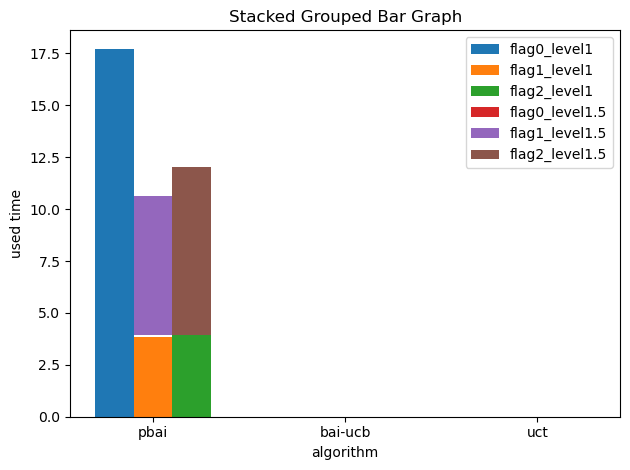

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
categories = ['pbai', 'bai-ucb', 'uct']
group_labels_level_1 = ['flag0_level1', 'flag1_level1' ,'flag2_level1']  # 그룹 레이블
group_labels_level_1_5 = ['flag0_level1.5', 'flag1_level1.5' ,'flag2_level1.5']  # 그룹 레이블

group_values_level_1 = [
    [pbai_used_time_flag_0[0], 0, 0 ],  # flag 0에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_1[0], 0, 0],  # flag 1에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_2[0], 0, 0]   # flag 2에 대한 알고리즘 별 level 1값 
]
group_values_level_1_5 = [
    [pbai_used_time_flag_0[1], 0, 0],  # flag 0에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_1[1], 0, 0],  # flag 1에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_2[1], 0, 0]   # flag 2에 대한 알고리즘 별 level 1값 
]

# 스택 쌓은 막대 그래프 그리기
bar_width = 0.2  # 막대 너비 설정
num_categories = len(categories)
x = np.arange(num_categories)  # x 축 위치 설정

fig, ax = plt.subplots()

bottom = np.zeros(num_categories)  # 막대 바닥 위치 초기화

for i, group_data in enumerate(group_values_level_1):
    ax.bar(x + i * bar_width, group_data, bar_width, label=group_labels_level_1[i])
    # bottom += group_data  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌

    # ax.bar(x + i * bar_width, group_values_level_1_5[i], bar_width, label=group_labels[i], bottom=bottom)

bottom += group_data  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌

for i, group_data in enumerate(group_values_level_1_5):
    ax.bar(x + i * bar_width, group_data, bar_width, label=group_labels_level_1_5[i], bottom=bottom)


ax.set_xticks(x + bar_width * (len(group_values_level_1) - 1) / 2)
ax.set_xticklabels(categories)
ax.set_xlabel('algorithm')
ax.set_ylabel('used time')
ax.set_title('Stacked Grouped Bar Graph')
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
# bai_perturb_idx = np.unravel_index(bai_perturb_result_all_values['level_2_values'].argmax(), bai_perturb_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = bai_perturb_result_all_values['pnp_all_joint_paths'][bai_perturb_idx[0]][bai_perturb_idx[1]]
# pick_all_objects = bai_perturb_result_all_values['pick_all_objects'][bai_perturb_idx[0]][bai_perturb_idx[1]]
# place_all_object_poses = bai_perturb_result_all_values['place_all_object_poses'][bai_perturb_idx[0]][bai_perturb_idx[1]]

# uct_idx = np.unravel_index(uct_result_all_values['level_2_values'].argmax(), uct_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = uct_result_all_values['pnp_all_joint_paths'][uct_idx[0]][uct_idx[1]]
# pick_all_objects = uct_result_all_values['pick_all_objects'][uct_idx[0]][uct_idx[1]]
# place_all_object_poses = uct_result_all_values['place_all_object_poses'][uct_idx[0]][uct_idx[1]]

# bai_ucb_idx = np.unravel_index(bai_ucb_result_all_values['level_2_values'].argmax(), bai_ucb_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = bai_ucb_result_all_values['pnp_all_joint_paths'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# pick_all_objects = bai_ucb_result_all_values['pick_all_objects'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# place_all_object_poses = bai_ucb_result_all_values['place_all_object_poses'][bai_ucb_idx[0]][bai_ucb_idx[1]]

# random_idx = np.unravel_index(random_result_all_values['level_2_values'].argmax(), random_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = random_result_all_values['pnp_all_joint_paths'][random_idx[0]][random_idx[1]]
# pick_all_objects = random_result_all_values['pick_all_objects'][random_idx[0]][random_idx[1]]
# place_all_object_poses = random_result_all_values['place_all_object_poses'][random_idx[0]][random_idx[1]]

[[OrderedDict([('pre_grasp',
                [array([-9.69645444e-03,  2.30636475e-01,  1.15546654e-03, -2.53907088e+00,
                        -8.16394484e-03,  2.90235778e+00, -7.98521388e-01]),
                 array([-1.93929089e-02,  2.64923409e-01,  2.31093308e-03, -2.46014788e+00,
                        -1.63278897e-02,  2.86312292e+00, -8.11644613e-01]),
                 array([-0.02908936,  0.29921034,  0.0034664 , -2.38122487, -0.02449183,
                         2.82388805, -0.82476784]),
                 array([-0.03878582,  0.33349728,  0.00462187, -2.30230187, -0.03265578,
                         2.78465318, -0.83789106]),
                 array([-0.04848227,  0.36778421,  0.00577733, -2.22337887, -0.04081972,
                         2.74541831, -0.85101429]),
                 array([-0.05817873,  0.40207114,  0.0069328 , -2.14445587, -0.04898367,
                         2.70618344, -0.86413751]),
                 array([-0.06787518,  0.43635808,  0.00808827, -2.065

In [14]:
pwd

'/home/juju/pytamp/results/benchmark1'